In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
crime = pd.read_csv('data_merged.csv', parse_dates=['Month'])
unem =  pd.read_csv('unem.csv')
police = pd.read_csv('police-stations.csv')

burglaries = crime[crime['Crime type'] == 'Burglary'].copy()

burg_by_lsoa = burglaries.groupby('LSOA name').size().reset_index(name='BurglaryCount')

In [5]:
burglaries['Borough'] = (
    burglaries['LSOA name']
    .str.replace(r'\s+\S+$', '', regex=True)
)

burg_by_borough = (
    burglaries
    .groupby('Borough')
    .size()
    .reset_index(name='BurglaryCount')
)

df = pd.merge(burg_by_borough, unem, on='Borough', how='inner')

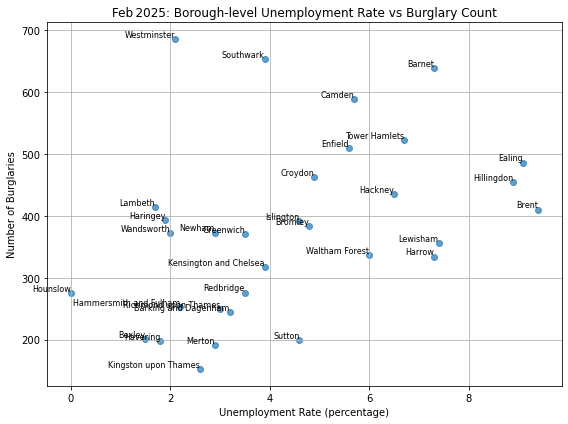

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(df['UnempRate'], df['BurglaryCount'], alpha=0.7)
for i, row in df.iterrows():
    plt.text(row['UnempRate'], row['BurglaryCount'], row['Borough'],
             fontsize=8, ha='right', va='bottom')

plt.title('Feb 2025: Borough‐level Unemployment Rate vs Burglary Count')
plt.xlabel('Unemployment Rate (percentage)')
plt.ylabel('Number of Burglaries')
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
corr = df['BurglaryCount'].corr(df['UnempRate'])
print(f'Pearson correlation between burglary count and unemployment rate: {corr:.2f}')

Pearson correlation between burglary count and unemployment rate: 0.40


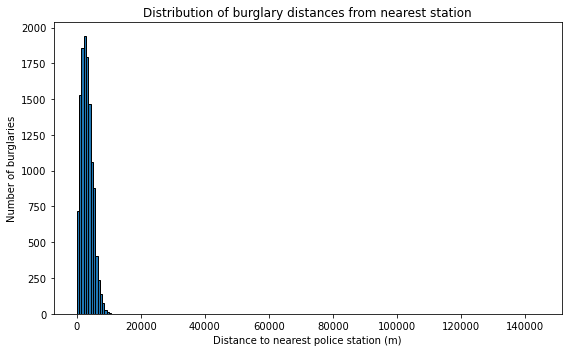

In [8]:
import pandas as pd
import numpy as np
from sklearn.neighbors import BallTree
import matplotlib.pyplot as plt

crimes = pd.read_csv('data_merged.csv')
stations = pd.read_csv('police-stations.csv')

burgs = crimes[crimes['Crime type'] == 'Burglary'].copy()

def to_radians(df, lon_col='Longitude', lat_col='Latitude'):
    return np.deg2rad(df[[lat_col, lon_col]].values)

burg_coords = to_radians(burgs)
station_coords = to_radians(stations, lon_col='Longitude', lat_col='Latitude')

tree = BallTree(station_coords, metric='haversine')
dist_rad, idx = tree.query(burg_coords, k=1)
dist_m = dist_rad.flatten() * 6371000  # convert radians to metres

burgs['dist_to_nearest_station_m'] = dist_m

plt.figure(figsize=(8,5))
plt.hist(dist_m, bins=200, edgecolor='black')
plt.xlabel('Distance to nearest police station (m)')
plt.ylabel('Number of burglaries')
plt.title('Distribution of burglary distances from nearest station')
plt.tight_layout()
plt.show()
